In [ ]:
cd /content/drive/MyDrive/2022/2022-2/빅데프/project

/content/drive/MyDrive/2022/2022-2/빅데프/project


In [ ]:
import io
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import numpy as np
import seaborn as sns
import datetime

In [ ]:
weather = pd.read_csv("weather_data.csv")
weather = weather.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [ ]:
weather.head()

,0,1,2,3
0,2003,"Wed, Dec 3",ATL,Light Rain
1,2003,"Thu, Dec 4",ATL,"Light Rain, Light Drizzle, Fog, Mist"
2,2003,"Fri, Dec 5",ATL,"Light Rain, Fog, Mist"
3,2003,"Wed, Dec 10",ATL,"Heavy Rain, Rain, Light Rain, Light Drizzle, Mist"
4,2003,"Sat, Dec 13",ATL,"Rain, Light Rain, Mist"


In [ ]:
weather.rename(columns = {'0' : 'year', '1':'date', '2':'airportcode', '3':'weather'}, inplace = True)
weather.head()

,year,date,airportcode,weather
0,2003,"Wed, Dec 3",ATL,Light Rain
1,2003,"Thu, Dec 4",ATL,"Light Rain, Light Drizzle, Fog, Mist"
2,2003,"Fri, Dec 5",ATL,"Light Rain, Fog, Mist"
3,2003,"Wed, Dec 10",ATL,"Heavy Rain, Rain, Light Rain, Light Drizzle, Mist"
4,2003,"Sat, Dec 13",ATL,"Rain, Light Rain, Mist"


In [ ]:
weather[['days', 'date']] = weather['date'].str.split(',', expand=True)
weather[['a','month', 'day']] = weather['date'].str.split(' ', expand=True)
weather = weather.drop(['a'], axis=1)

In [ ]:
weather['weather'] = weather['weather'].str.split(',')

In [ ]:
weather.head()

,year,date,airportcode,weather,days,month,day
0,2003,Dec 3,ATL,[Light Rain],Wed,Dec,3
1,2003,Dec 4,ATL,"[Light Rain, Light Drizzle, Fog, Mist]",Thu,Dec,4
2,2003,Dec 5,ATL,"[Light Rain, Fog, Mist]",Fri,Dec,5
3,2003,Dec 10,ATL,"[Heavy Rain, Rain, Light Rain, Light Drizzl...",Wed,Dec,10
4,2003,Dec 13,ATL,"[Rain, Light Rain, Mist]",Sat,Dec,13


In [ ]:
weather['rain'] = None
weather['snow'] = None
weather['mist'] = None
weather['remainder'] = None

In [ ]:
for i in range(len(weather)):
  w = weather['weather'][i]
  rain, mist, snow, remainder = [], [], [], []
  for j in range(len(w)):
    if 'Rain' in str(w[j]):
      rain.append(w[j])
    elif 'Fog' in str(w[j]) or 'Mist' in str(w[j]):
      mist.append(w[j])
    elif 'Snow' in str(w[j]):
      snow.append(w[j])
    else:
      remainder.append(w[j])
  
  
  if len(rain) > 0:
    weather['rain'][i] = rain
  if len(mist) > 0:
    weather['mist'][i] = mist
  if len(snow) > 0:
    weather['snow'][i] = snow
  if len(remainder) > 0:
    weather['remainder'][i] = remainder

<ipython-input-98-d0768ef4d9bb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['rain'][i] = rain
<ipython-input-98-d0768ef4d9bb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['mist'][i] = mist
<ipython-input-98-d0768ef4d9bb>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['remainder'][i] = remainder
<ipython-input-98-d0768ef4d9bb>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [ ]:
weather.head()

,year,date,airportcode,weather,days,month,day,rain,snow,mist,remainder
0,2003,Dec 3,ATL,[Light Rain],Wed,Dec,3,[Light Rain],0,0,0
1,2003,Dec 4,ATL,"[Light Rain, Light Drizzle, Fog, Mist]",Thu,Dec,4,[Light Rain],0,"[ Fog, Mist]",[ Light Drizzle]
2,2003,Dec 5,ATL,"[Light Rain, Fog, Mist]",Fri,Dec,5,[Light Rain],0,"[ Fog, Mist]",0
3,2003,Dec 10,ATL,"[Heavy Rain, Rain, Light Rain, Light Drizzl...",Wed,Dec,10,"[Heavy Rain, Rain, Light Rain]",0,[ Mist],[ Light Drizzle]
4,2003,Dec 13,ATL,"[Rain, Light Rain, Mist]",Sat,Dec,13,"[Rain, Light Rain]",0,[ Mist],0


- rain, light rain, heavy rain을 각 각 1,2,3으로 부여해 비오는 정도를 표시하려고 함
- 하지만 heavy rain인 날은 ['rain', 'light rain', 'heavy rain']을 모두 가지고 있음
- 안개 종류: ' Fog','Freezing Fog', ' Mist', ' Patches of Fog'  Shallow Fog'  Sky-Obscuring Fog'  Fog in the Vicinity
- 안개 역시 종류가 다양해 숫자로 정도를 부여하기 어려움
- 따라서 **안개 낀 날, 비가 온 날, 눈이 온날 : 0/1로 구분**

In [ ]:
weather['rain'] = False
weather['snow'] = False
weather['fog'] = False

In [ ]:
for i in range(len(weather)):
  w = weather['weather'][i]
  for j in range(len(w)):
    if 'Rain' in str(w[j]):
       weather['rain'][i] = True
    elif 'Fog' in str(w[j]) or 'Mist' in str(w[j]):
      weather['fog'][i] = True
    elif 'Snow' in str(w[j]):
      weather['snow'][i] = True

<ipython-input-132-8b18de593a4c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['rain'][i] = True
<ipython-input-132-8b18de593a4c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['fog'][i] = True
<ipython-input-132-8b18de593a4c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather['snow'][i] = True


In [ ]:
weather.head()

,year,date,airportcode,weather,days,month,day,rain,snow,fog
0,2003,Dec 3,ATL,[Light Rain],Wed,Dec,3,True,False,False
1,2003,Dec 4,ATL,"[Light Rain, Light Drizzle, Fog, Mist]",Thu,Dec,4,True,False,True
2,2003,Dec 5,ATL,"[Light Rain, Fog, Mist]",Fri,Dec,5,True,False,True
3,2003,Dec 10,ATL,"[Heavy Rain, Rain, Light Rain, Light Drizzl...",Wed,Dec,10,True,False,True
4,2003,Dec 13,ATL,"[Rain, Light Rain, Mist]",Sat,Dec,13,True,False,True


In [ ]:
weather['rain'] = weather['rain'].astype(bool).astype(int)
weather['snow'] = weather['snow'].astype(bool).astype(int)
weather['fog'] = weather['fog'].astype(bool).astype(int)

In [ ]:
weather.head()

,year,date,airportcode,weather,days,month,day,rain,snow,fog
0,2003,Dec 3,ATL,[Light Rain],Wed,Dec,3,1,0,0
1,2003,Dec 4,ATL,"[Light Rain, Light Drizzle, Fog, Mist]",Thu,Dec,4,1,0,1
2,2003,Dec 5,ATL,"[Light Rain, Fog, Mist]",Fri,Dec,5,1,0,1
3,2003,Dec 10,ATL,"[Heavy Rain, Rain, Light Rain, Light Drizzl...",Wed,Dec,10,1,0,1
4,2003,Dec 13,ATL,"[Rain, Light Rain, Mist]",Sat,Dec,13,1,0,1


In [ ]:
weather = weather.drop(['days'], axis=1)
weather.head()

,year,date,airportcode,weather,month,day,rain,snow,fog
0,2003,Dec 3,ATL,[Light Rain],Dec,3,1,0,0
1,2003,Dec 4,ATL,"[Light Rain, Light Drizzle, Fog, Mist]",Dec,4,1,0,1
2,2003,Dec 5,ATL,"[Light Rain, Fog, Mist]",Dec,5,1,0,1
3,2003,Dec 10,ATL,"[Heavy Rain, Rain, Light Rain, Light Drizzl...",Dec,10,1,0,1
4,2003,Dec 13,ATL,"[Rain, Light Rain, Mist]",Dec,13,1,0,1


In [ ]:
weather.isna().sum()

year           0
date           0
airportcode    0
weather        0
month          0
day            0
rain           0
snow           0
fog            0
dtype: int64

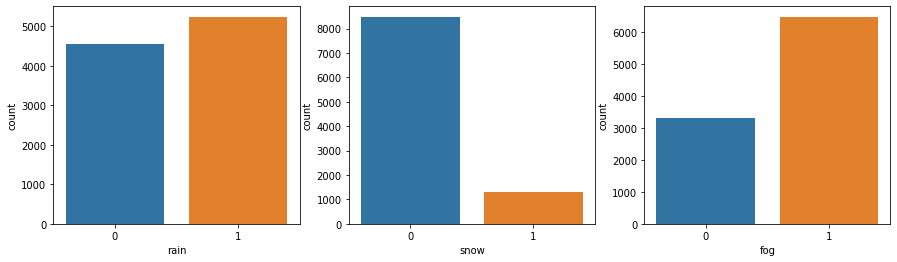

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 4))
sns.countplot(data=weather, x='rain', ax=ax[0])
sns.countplot(data=weather, x='snow', ax=ax[1])
sns.countplot(data=weather, x='fog', ax=ax[2])

- rain: 거의 반반 비슷함
- fog: 안개 낀날이 더 많다

In [ ]:
weather.to_csv('weather.csv')